In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the datast using Pandas

In [24]:
data = pd.read_csv("police_department_data.csv")

Explore the data which is read

In [25]:
data.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"


In [26]:
data.dtypes

incident_id             int64
category               object
crime_description      object
crime_date             object
department_district    object
resolution             object
address                object
department_id           int64
location               object
dtype: object

In [27]:
# describing the data
data.describe()

,incident_id,department_id
count,1.505000e+05,1.505000e+05
mean,1.616440e+08,1.616440e+13
std,5.535976e+06,5.535976e+11
min,1.135121e+07,1.135121e+12
25%,1.603283e+08,1.603283e+13
50%,1.606541e+08,1.606541e+13
75%,1.609764e+08,1.609764e+13
max,9.910090e+08,9.910090e+13


In [28]:
# To check if there are any null values

data.isnull().sum()

incident_id            0
category               0
crime_description      0
crime_date             0
department_district    1
resolution             0
address                0
department_id          0
location               0
dtype: int64

In [29]:
# Now replace/filling the missing value in department_district using the mode values

data['department_district'].fillna(data['department_district'].mode()[0], inplace = True)

In [30]:
# Re-confirm that whether the null values is replaced with mode value

data.isnull().sum()

incident_id            0
category               0
crime_description      0
crime_date             0
department_district    0
resolution             0
address                0
department_id          0
location               0
dtype: int64

## Visualizing Data

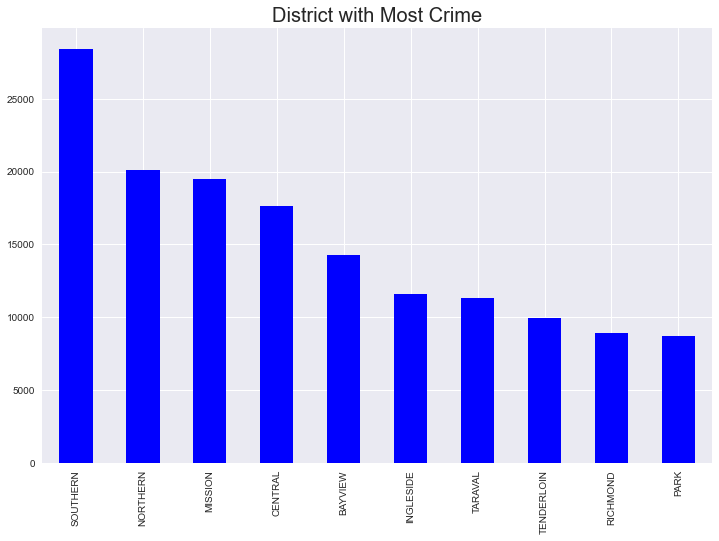

In [34]:
# District with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 1, 15))
data['department_district'].value_counts().plot.bar(color = 'blue', figsize = (12, 8))

plt.title('District with Most Crime',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


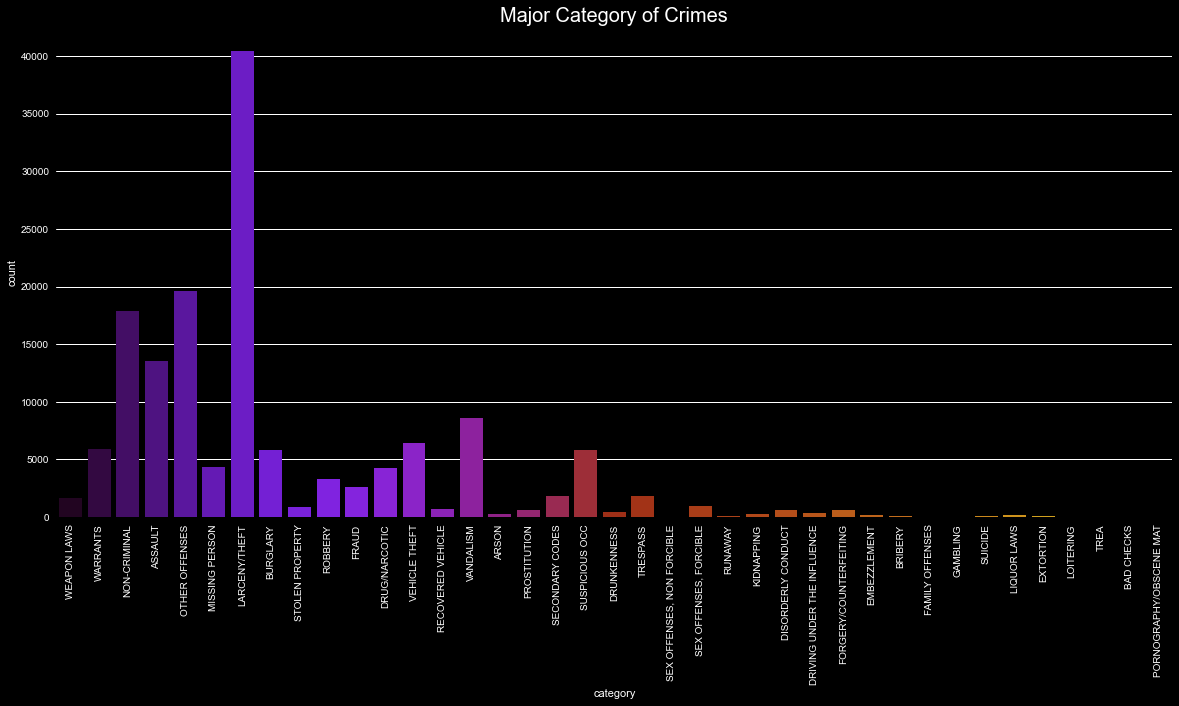

In [42]:
# Different categories of crime

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['category'], palette = 'gnuplot')

plt.title('Major Category of Crimes', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [40]:
!pip install wordcloud

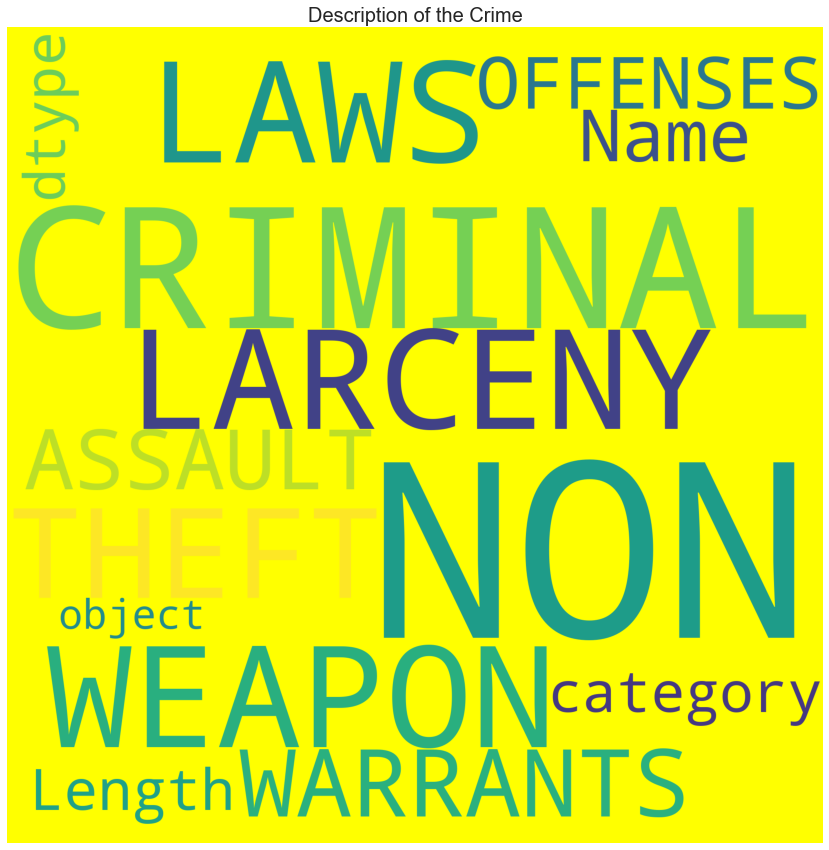

In [41]:
# Let's explore these category of crime using wordcloud for better understanding

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')

wc = WordCloud(background_color = 'Yellow', width = 2000, height = 2000).generate(str(data['category']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [55]:
# As our datetime is in oject format, let's change it to datetime format for visualization

data['crime_date'] = pd.to_datetime(df.crime_date, format='%Y-%m-%d')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


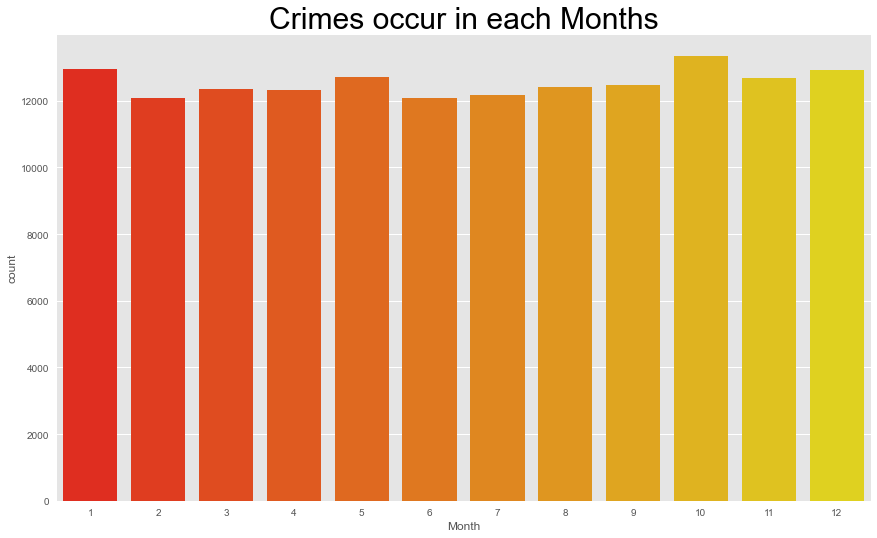

In [82]:
data['Date'] = pd.to_datetime(data['crime_date'])

data['Month'] = data['crime_date'].dt.month

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13, 8)

sns.countplot(data['Month'], palette = 'autumn')
plt.title('Crimes occur in each Months', fontsize = 30, color='black')


plt.show()

In [96]:
#To get the all the unique list values of feature department_district

arr = data["department_district"].to_numpy()
unique_arr = np.unique(arr)
print(unique_arr)

['BAYVIEW' 'CENTRAL' 'INGLESIDE' 'MISSION' 'NORTHERN' 'PARK' 'RICHMOND'
 'SOUTHERN' 'TARAVAL' 'TENDERLOIN']


In [97]:
t = data.department_district.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["BAYVIEW", "CENTRAL", "INGLESIDE", "MISSION", "NORTHERN", "PARK", "RICHMOND", "SOUTHERN", "TARAVAL", "TENDERLOIN"])

table = table.reset_index()
table.rename({'index': 'District'}, axis='columns', inplace=True)

table

,District,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28446
8,TARAVAL,11325
9,TENDERLOIN,9942


## Conclusion

1. Crime rate in Southern district/region is most followed by Northern region.
2. Occurance of crime rate based on months is approximtely same
3. The frequency of LARCENCY category of crime occurs most
4. Need to come up with a good planning/strategy to takle the LARCENCY crime